In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import axes3d, art3d
from matplotlib import cm
from matplotlib.patches import Circle
%matplotlib notebook

In [2]:
# Cantidad óptima:
def calcular_q_opt (k, d, t, c1):
    return np.sqrt((2*k*d)/(t*c1))

# Costo de adquisición:
def calcular_cadq(b, d):
    return b * d

# Costo de almacenamiento:
def calcular_cstock(q, c1, t):
    return 0.5 * q * c1 * t

# Costo de pedido:
def calcular_cpedido(k, d, q):
    return  k * (d / q)

# Costo total esperado:
def calcular_cte(cdemanda, cstock, cpedido):
    return cdemanda + cstock + cpedido

In [4]:
diasmes = 30
t = 1 # período de análisis
interes = 0.1 # anual

# Datos producto 1:
b_1 = 30 #costo por producto
alquiler_1 = 30 # diario
compra_1 = 100 # unidad 
calidadrecepcion_1 = 200 # pedido
demanda_1 = 3000 # por año
k_1 = calidadrecepcion_1 + compra_1 # costo de orden
d_1 = demanda_1 # demanda
c1_1 = b_1 * interes + (alquiler_1 * diasmes * 12) # costo unitario

# Datos producto 2:
b_2 = 40 #costo por producto
alquiler_2 = 40 # diario
compra_2 = 150 # unidad 
calidadrecepcion_2 = 250 # pedido
demanda_2 = 4300 # por año
k_2 = calidadrecepcion_2 + compra_2 # costo de orden
d_2 = demanda_2 # demanda
c1_2 = b_2 * interes + (alquiler_2 * diasmes * 12) # costo unitario

# Cálculo del Q1 y Q2 óptimo y CTE óptimo:
q1_opt = calcular_q_opt(k_1, d_1, t, c1_1)
print(f'La cantidad óptima para el ítem 1 es: {q1_opt:.2f}')

q2_opt = calcular_q_opt(k_2, d_2, t, c1_2)
print(f'La cantidad óptima para el ítem 2 es: {q2_opt:.2f}')

# CTE:
## Producto 1:
cdemanda1 = calcular_cadq(b_1, d_1)
cstock1 = calcular_cstock(q1_opt, c1_1, t)
cpedido1 = calcular_cpedido(k_1, d_1, q1_opt)
cte_opt1 = calcular_cte(cdemanda1, cstock1, cpedido1)

## Producto 2:
cdemanda2 = calcular_cadq(b_2, d_2)
cstock2 = calcular_cstock(q2_opt, c1_2, t)
cpedido2 = calcular_cpedido(k_2, d_2, q2_opt)
cte_opt2 = calcular_cte(cdemanda2, cstock2, cpedido2)

## Total:
cte_opt_t = cte_opt1 + cte_opt2
print(f'El costo total esperado óptimo es: {cte_opt_t:.2f}')

La cantidad óptima para el ítem 1 es: 12.91
La cantidad óptima para el ítem 2 es: 15.45
El costo total esperado óptimo es: 624044.52


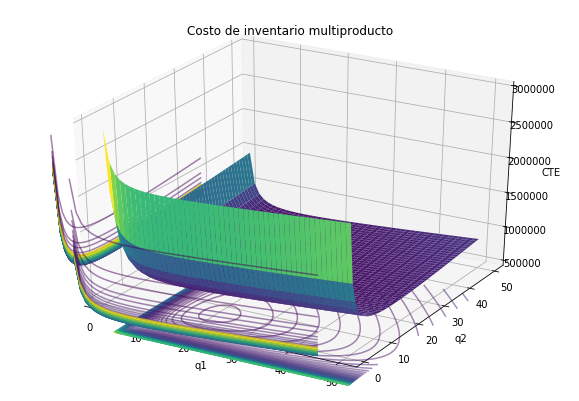

In [5]:
# Cálculo y gráfico de la superficie de valores:
q1_linspace = np.linspace(1,50)
q2_linspace = np.linspace(1,50)
Q1, Q2 = np.meshgrid(q1_linspace, q2_linspace)

vect_cte2 = np.zeros(Q1.shape[0] * Q1.shape[1])

for i, (q1_i, q2_i) in enumerate(zip(np.ravel(Q1), np.ravel(Q2))):
    # Actualizar vector de costo demanda:
    cdemanda_i_1 = calcular_cadq(b_1, d_1)
    cdemanda_i_2 = calcular_cadq(b_2, d_2)
    cdemanda_i_tot = cdemanda_i_1 + cdemanda_i_2
    
    # Actualizar vector de costo de almacenamiento:
    cstock_i_1 = calcular_cstock(q1_i, c1_1, t)
    cstock_i_2 = calcular_cstock(q2_i, c1_1, t)
    cstock_i_tot = cstock_i_1 + cstock_i_2
    
    # Actualizar vector de costo de pedido:
    cpedido_i_1 = calcular_cpedido(k_1, d_1, q1_i)
    cpedido_i_2 = calcular_cpedido(k_2, d_2, q2_i)
    cpedido_i_tot = cpedido_i_1 + cpedido_i_2
    
    # Actualizar vector de costo total:
    cte_i_1 = calcular_cte(cdemanda_i_1, cstock_i_1, cpedido_i_1)
    cte_i_2 = calcular_cte(cdemanda_i_2, cstock_i_2, cpedido_i_2)
    cte_i_tot = cte_i_1 + cte_i_2
    vect_cte2[i] = cte_i_tot

    
CTE2 = vect_cte2.reshape(Q1.shape)

# plotear figura:
fig = plt.figure(figsize=(10,7))
# plotear superficie
ax = plt.axes(projection='3d')
ax.plot_surface(Q1, Q2, CTE2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# Countour en z:
ax.contour(Q1, Q2, CTE2, 120, offset=-50, lw=3, linestyles="solid", alpha=0.5)
# Proyecciones en x, y:
ax.contour(Q1, Q2, CTE2, 120, offset=-10, lw=3, linestyles="solid", alpha=0.5, zdir='x')
ax.contour(Q1, Q2, CTE2, 120, offset=-10, lw=3, linestyles="solid", alpha=0.5, zdir='y')
# agregar punto óptimo:
ax.scatter([q1_opt], [q2_opt], [cte_opt_t], color="r", s=20, marker='o', linewidth=5)

ax.set_title('Costo de inventario multiproducto')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('CTE')

plt.show()

<a list of 12 text.Text objects>

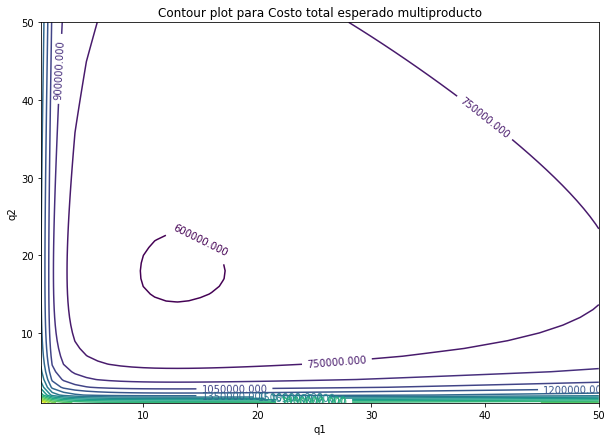

In [6]:
fig, ax0 = plt.subplots(figsize=(10,7))
# Z contour
CS0 = ax0.contour(Q1, Q2, CTE2, 20)
ax0.set_title('Contour plot para Costo total esperado multiproducto')
ax0.set_xlabel('q1')
ax0.set_ylabel('q2')
ax0.clabel(CS0, inline=1, fontsize=10)